In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import h5py
import yaml
import pickle 
import mplhep as hep
import sklearn.metrics as metrics
plt.rcParams['figure.dpi'] = 200
hep.style.use(hep.style.CMS)
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

def multipage(filename, figs=None, dpi=200):
    """Creates a pdf with one page per plot"""
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
        print("No figures handed")
    for fig in figs:
        plt.figure(fig).savefig(pp, format='pdf')
    pp.close()

Number of events used:31255
Number of events used:5000
Number of events used:98600
Number of events used:299303
Number of events used:100000
Number of events used:300000
Number of events used:293484


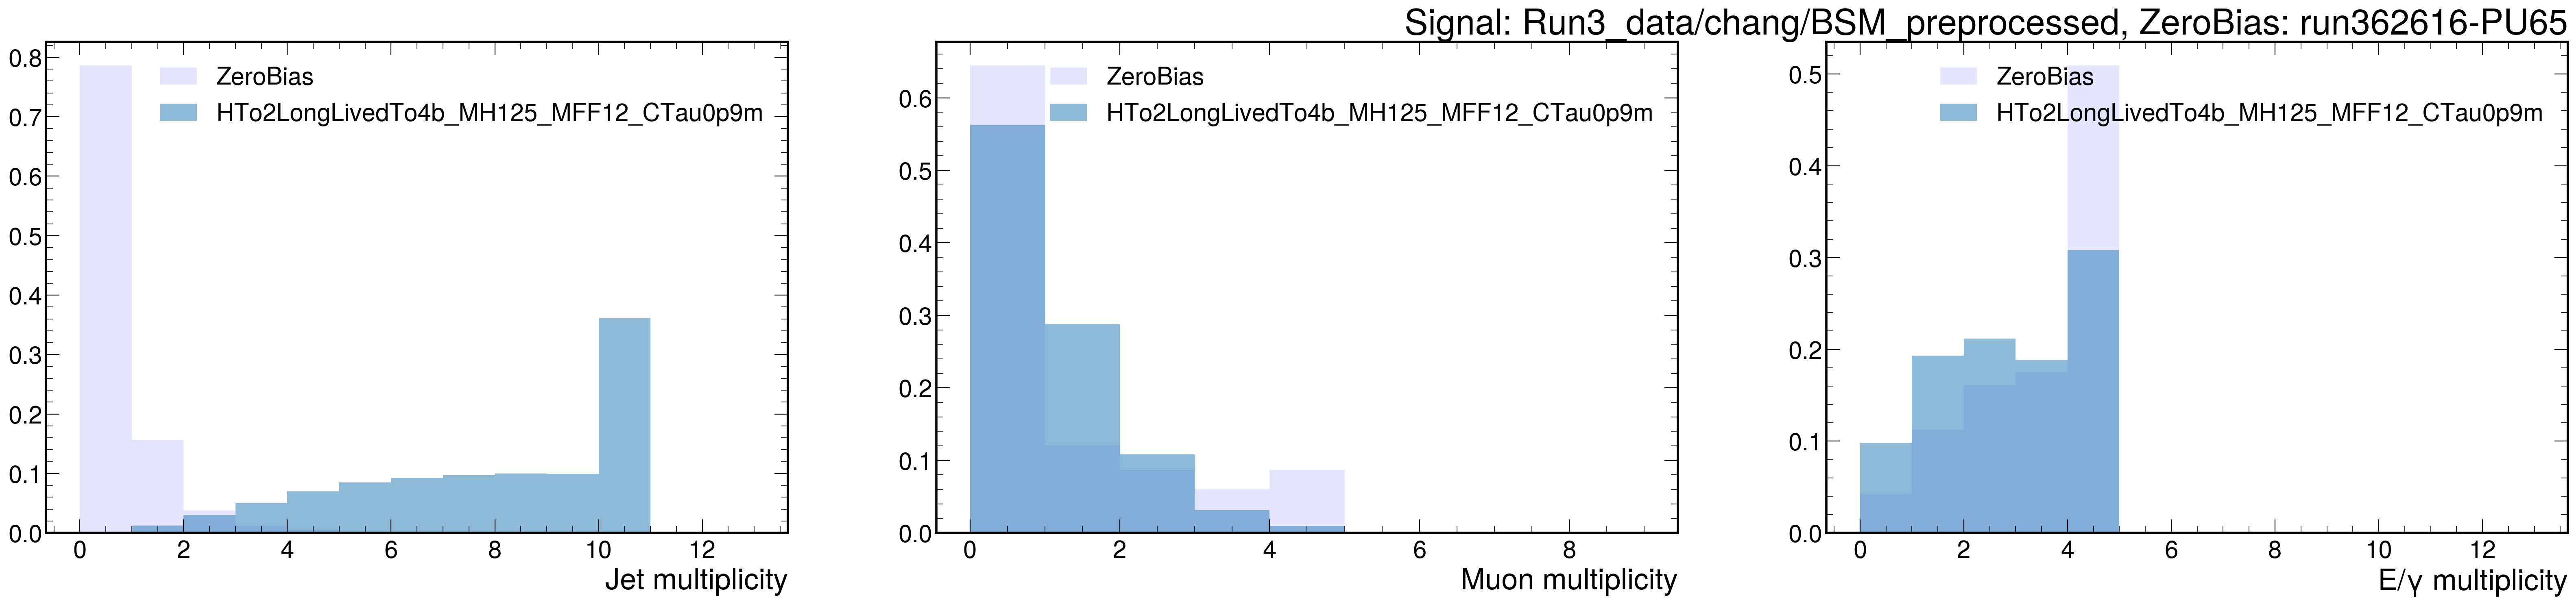

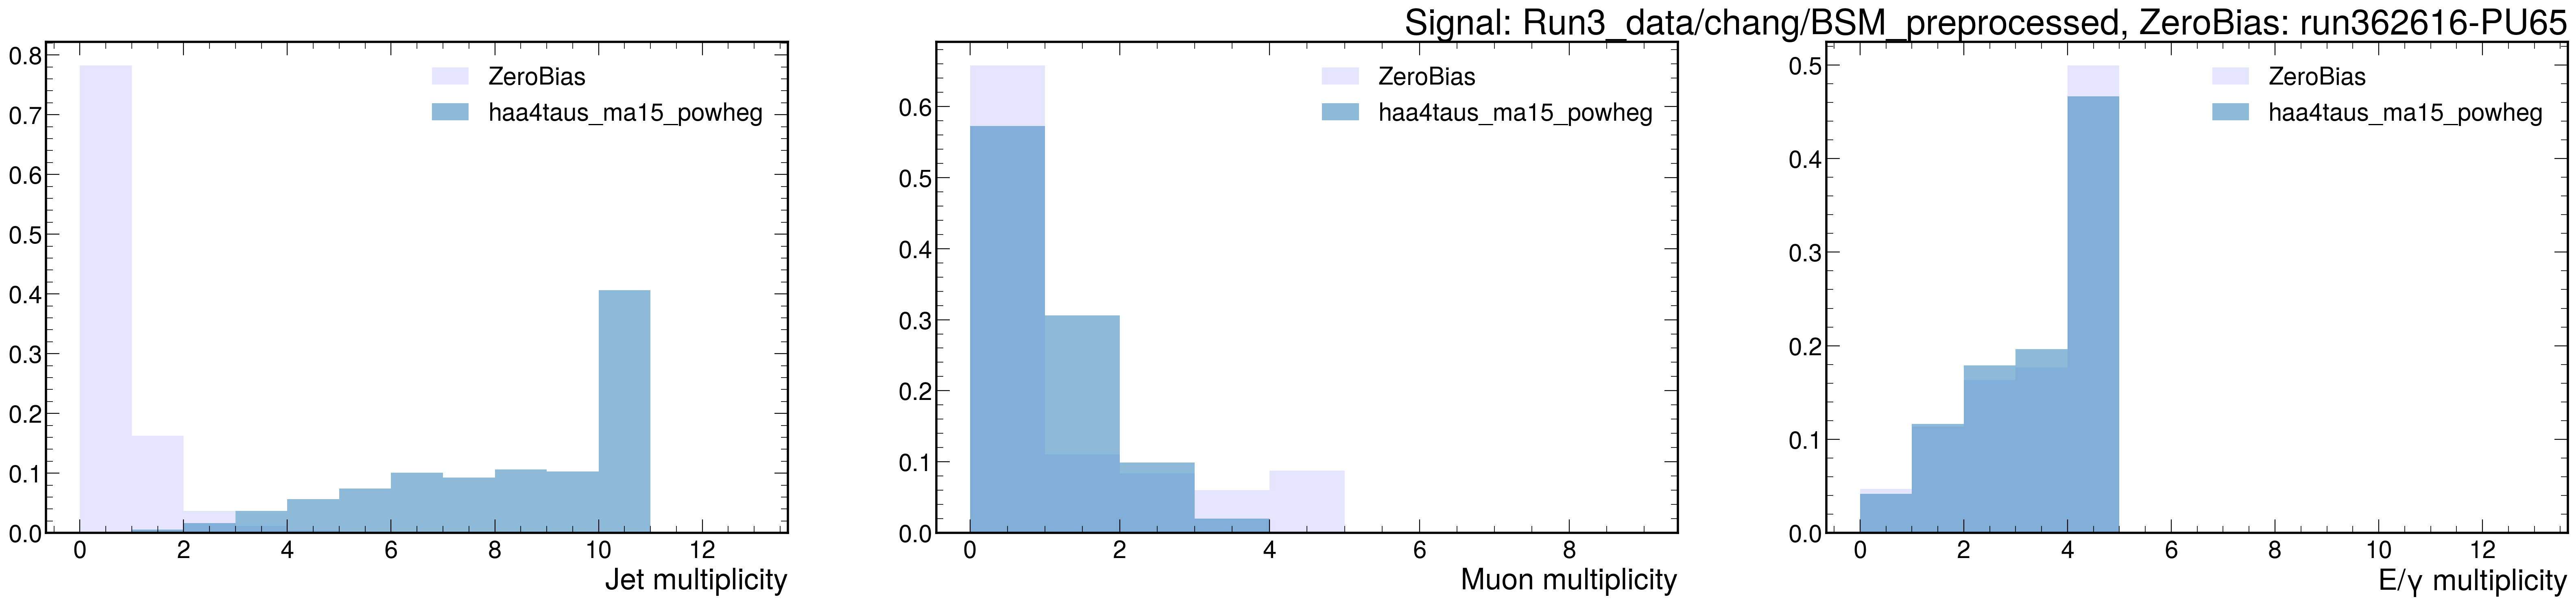

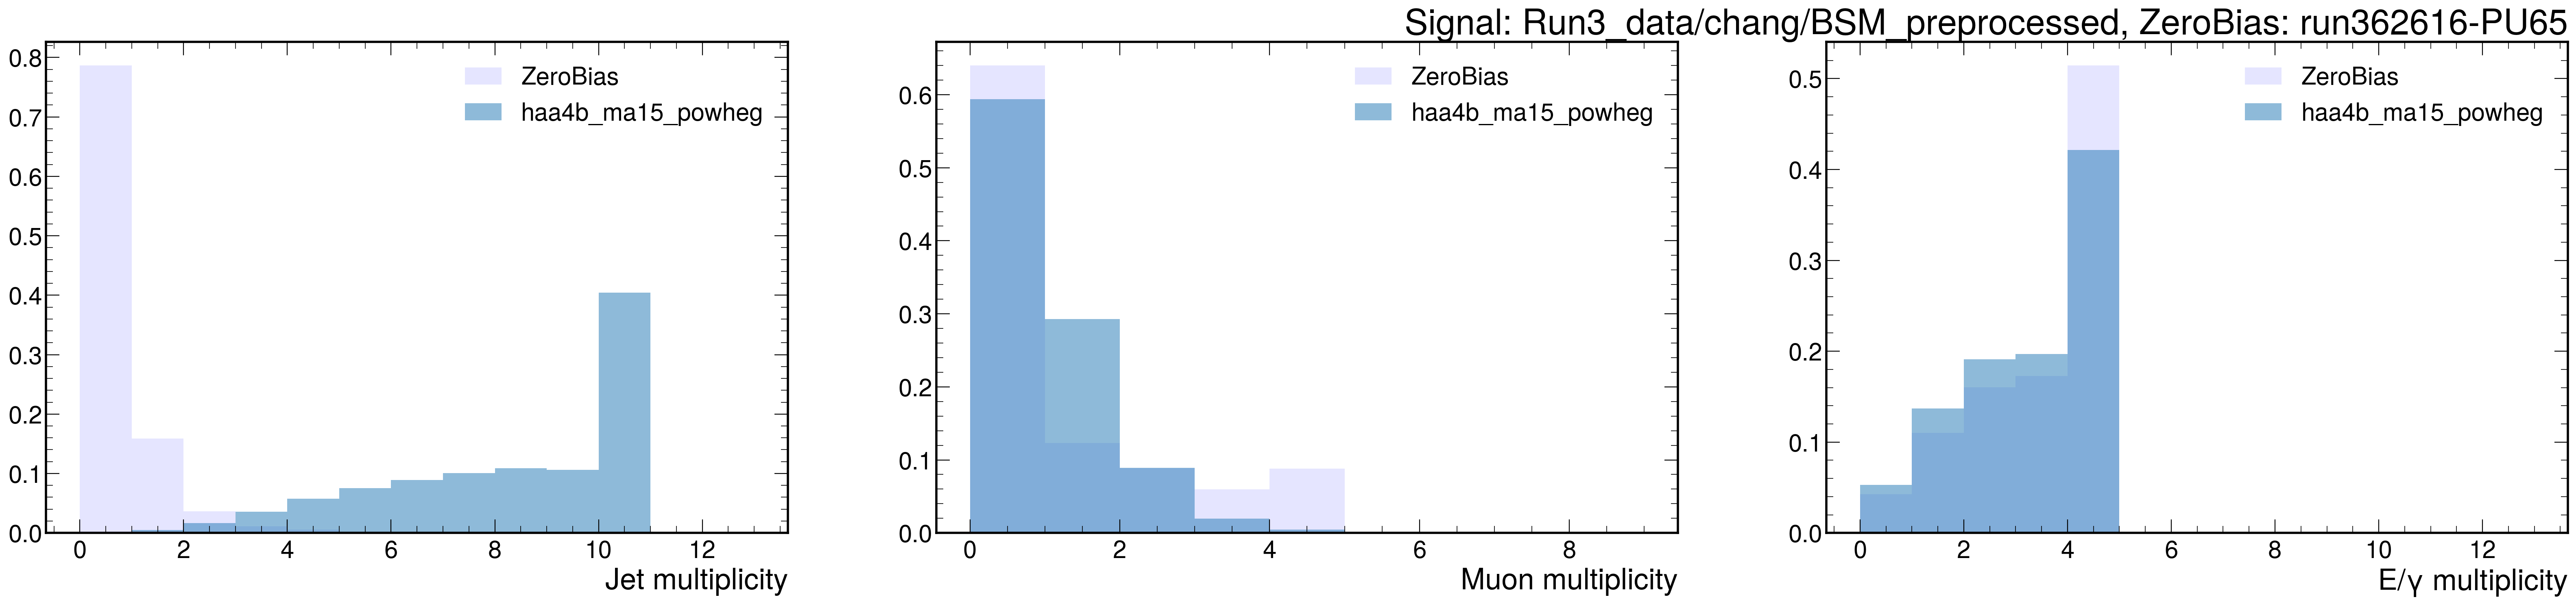

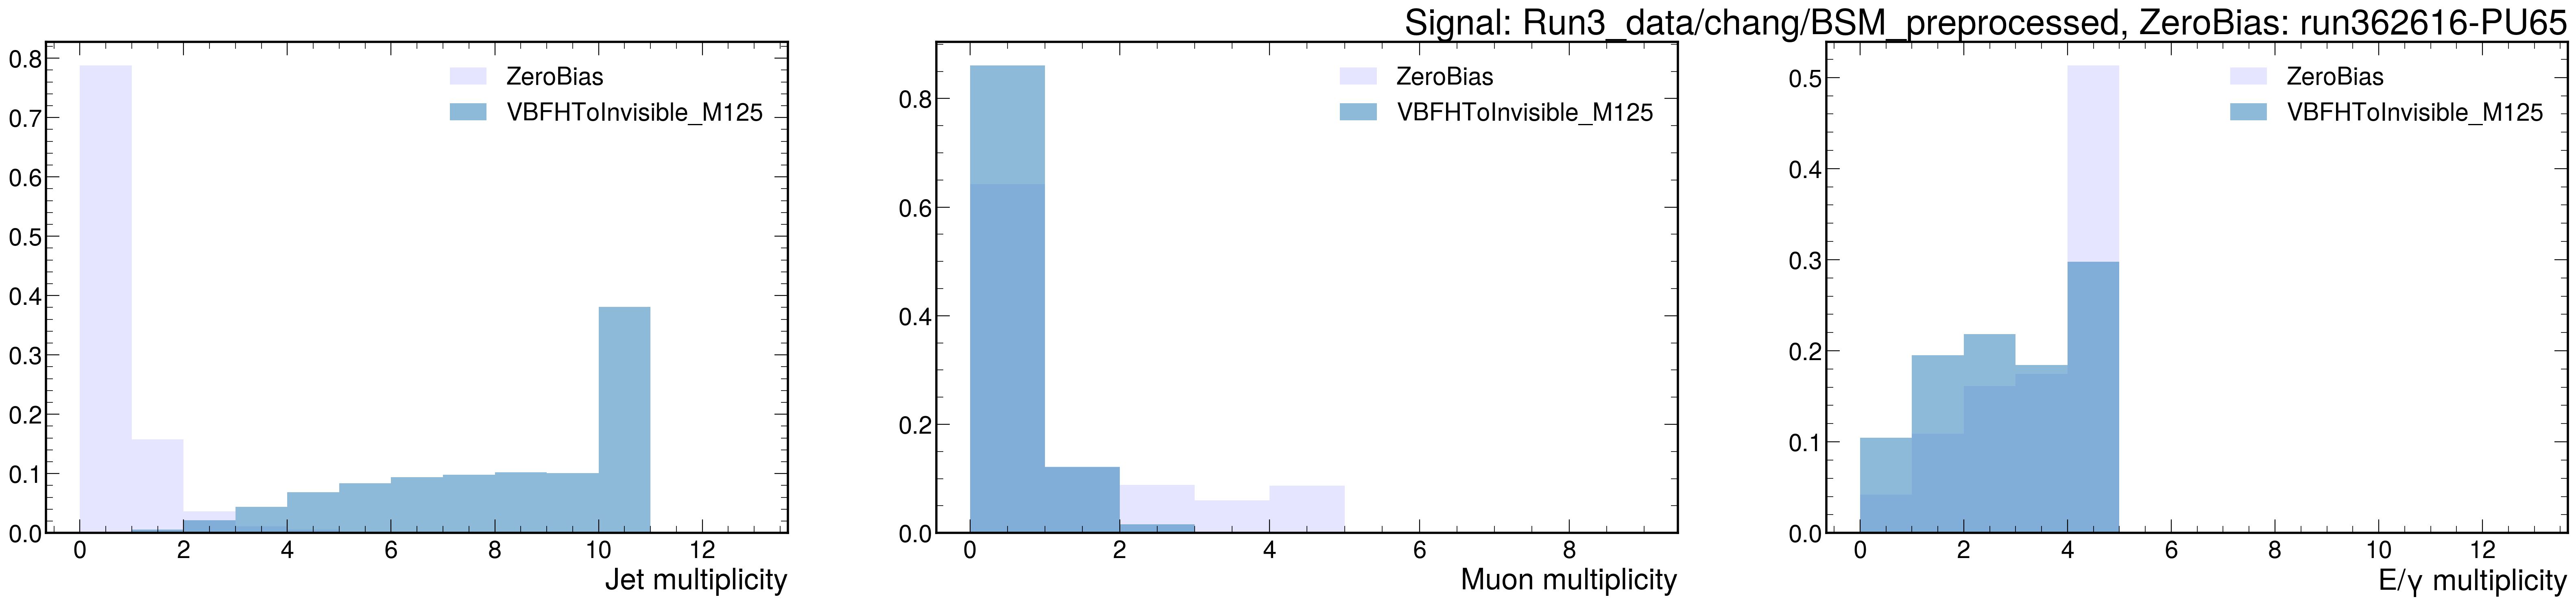

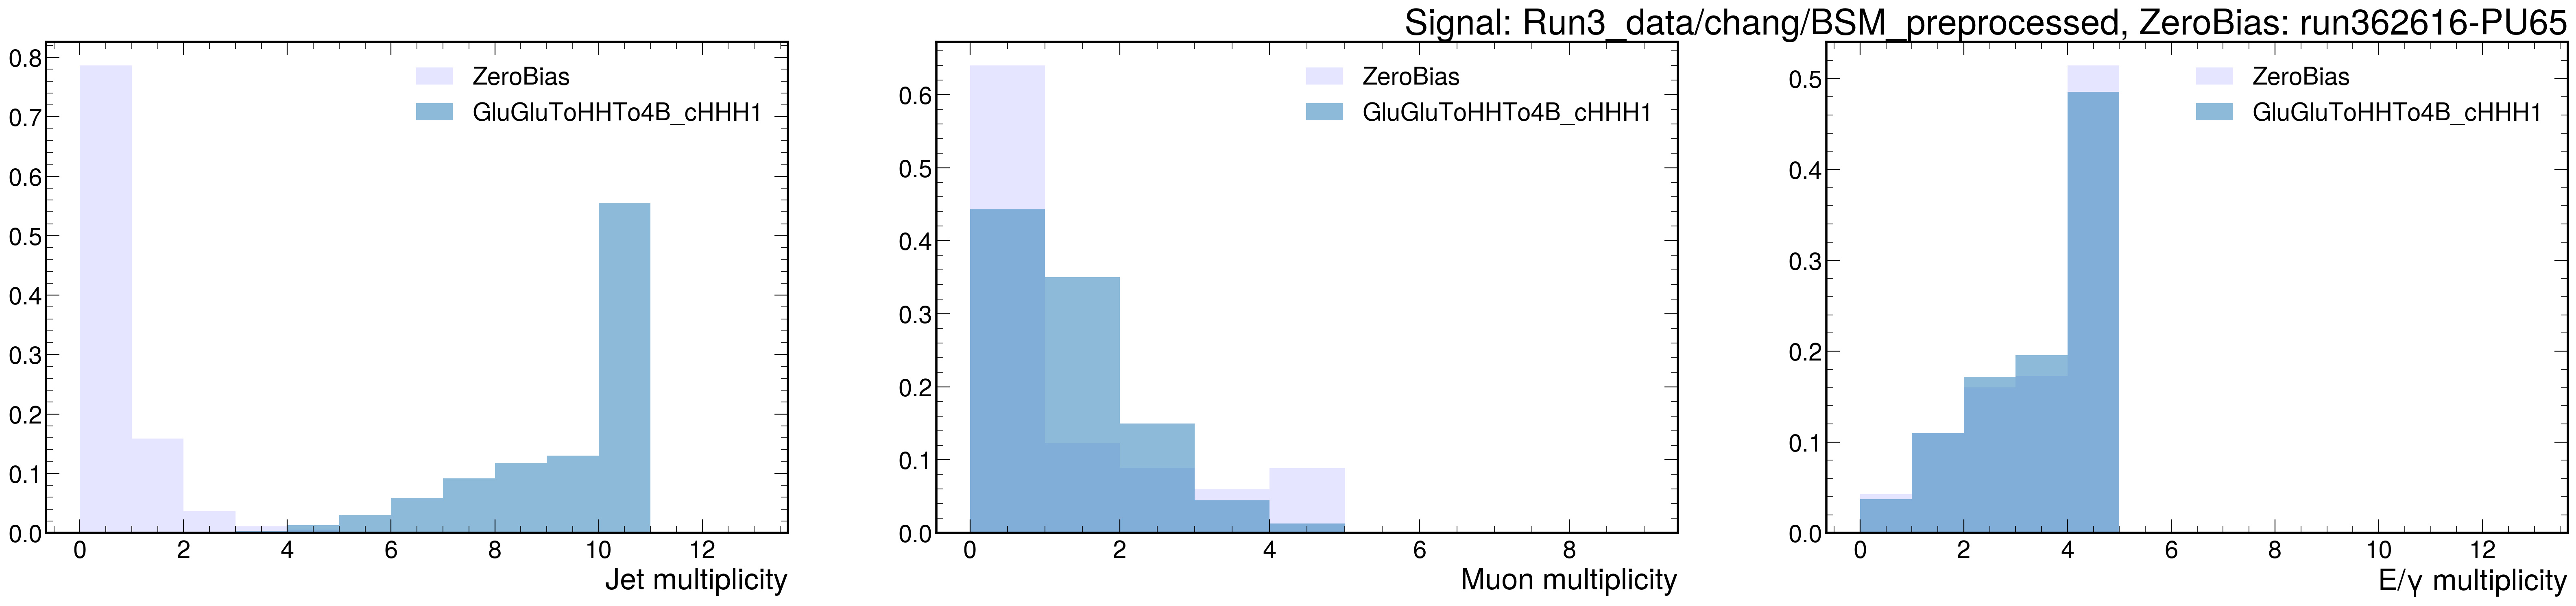

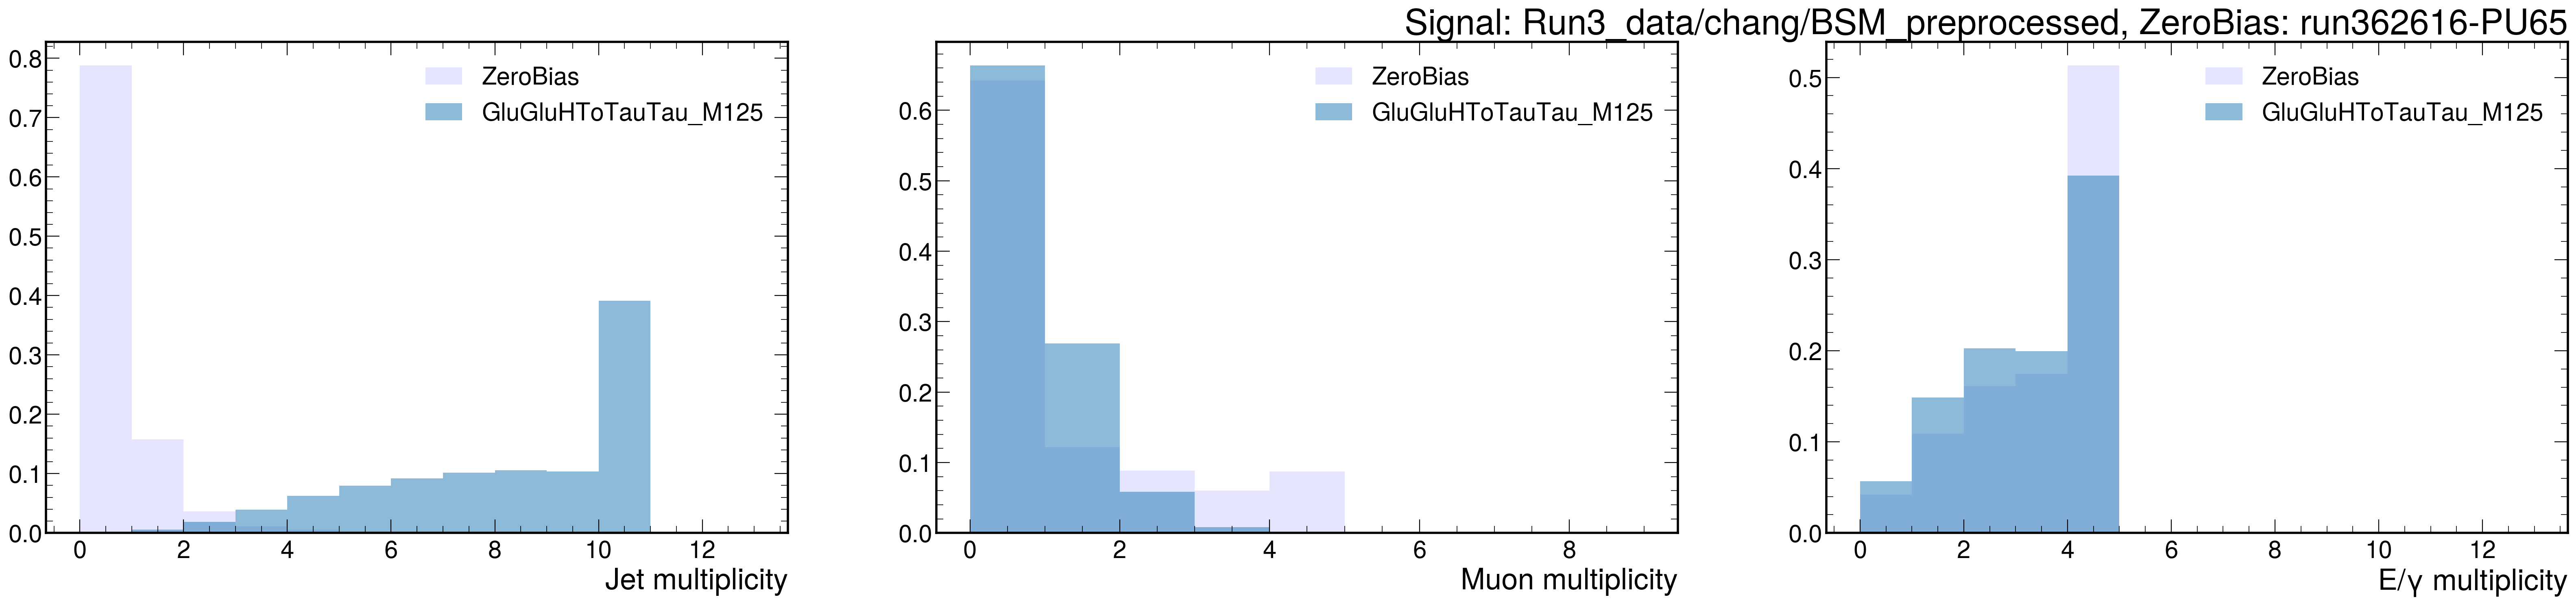

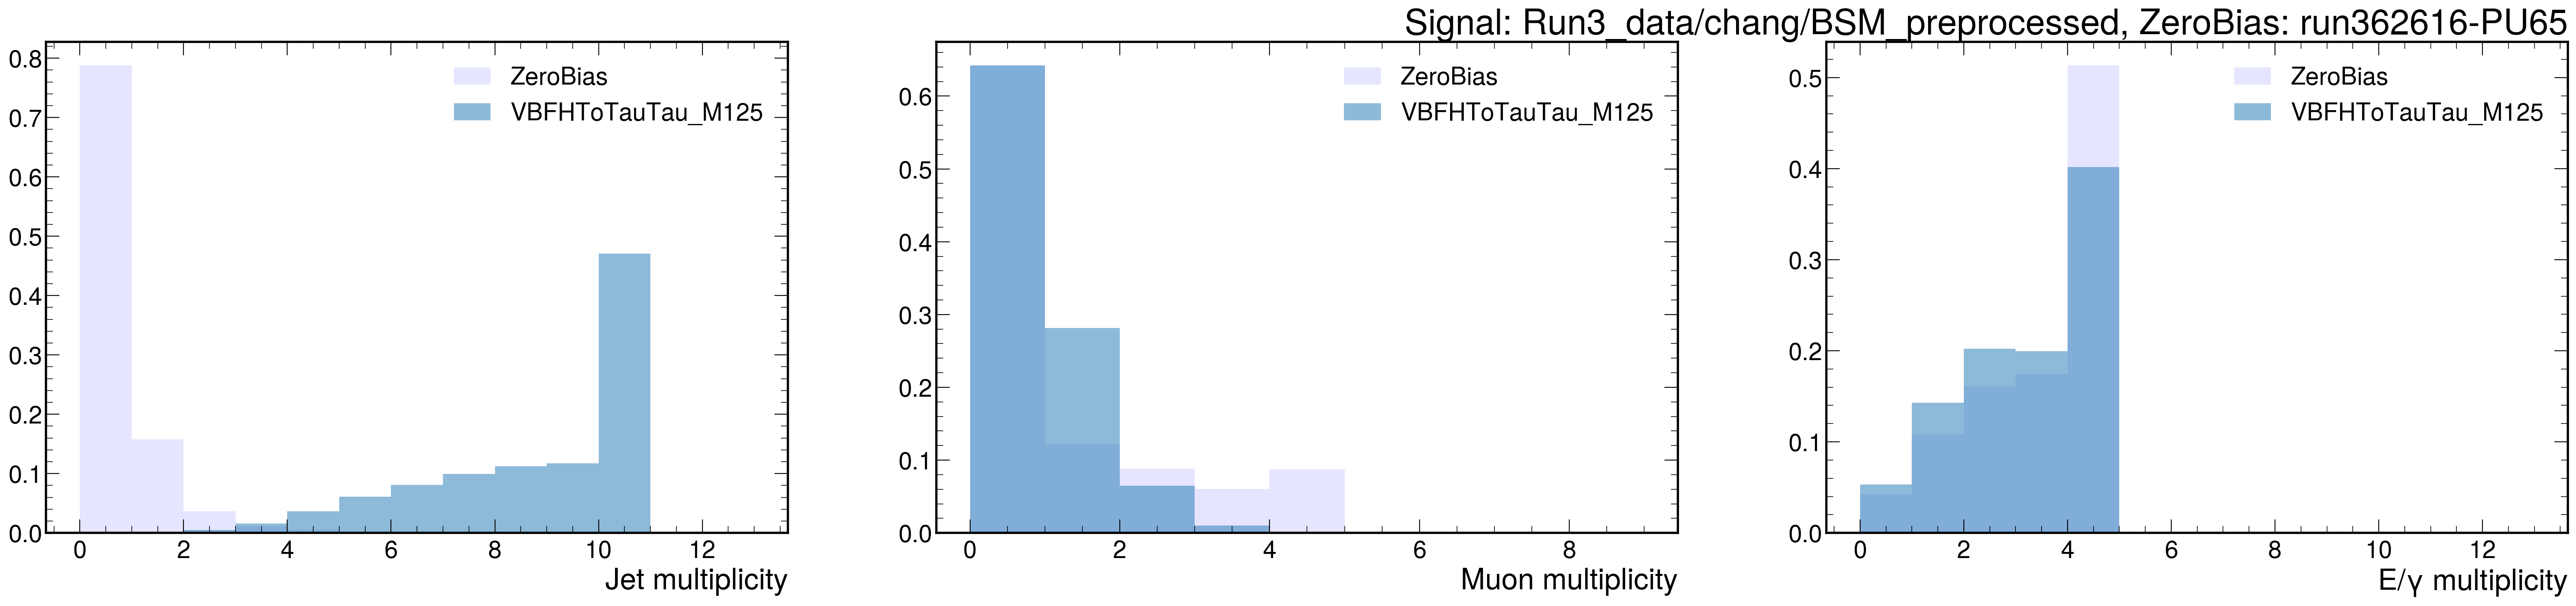

In [10]:
# Open h5 from Signal (Noah)


filename_nano = "/eos/home-t/thaarres/L1TNtupleRun3/Run3_data/chang/BSM_preprocessed.h5"
file_nano = h5py.File(filename_nano, 'r')
file_nano.keys()
signal_name = 'GluGluHToTauTau_M125'

# Open h5 from L1Ntuple (Jen)
filename_h5 = "/eos/home-t/thaarres/L1TNtupleRun3/Run3_data/chang/run362616-PU65.h5"
file_h5 = h5py.File(filename_h5, 'r')
file_h5.keys()

# Plot all of the inputs for the two files against eachother, will produce a lot of outputs 
object_names = ["MET"]+["Jet #"]*12+["$\mu$ #"]*8+["E/$\gamma$ #"]*12
object_numbers = [""]+[str(i) for i in range(12)]+[str(i) for i in range(8)]+[str(i) for i in range(12)]
object_names = [object_names[i]+object_numbers[i] for i in range(len(object_names))]
object_names = [[object_names[i]+" $p_T$",object_names[i]+" $\eta$",object_names[i]+" $\phi$"] for i in range(len(object_names))]

signal_names = ["HTo2LongLivedTo4b_MH125_MFF12_CTau0p9m",
                "haa4taus_ma15_powheg",
                "haa4b_ma15_powheg",
                "VBFHToInvisible_M125",
                "GluGluToHHTo4B_cHHH1",
                "GluGluHToTauTau_M125",
                "VBFHToTauTau_M125"
                ]

for signal_name in signal_names:
    n_obj =  33 # number of input objects (MET, 12 jets, 8 muons, 12 egammas)
    nsamples = file_nano[signal_name].shape[0]#2000000# number of events to run on 
    print("Number of events used:"+str(nsamples))

    njets_nano = 0
    njets_h5 = 0
    nmuons_nano = 0 
    nmuons_h5 = 0 
    negs_nano = 0
    negs_h5 = 0

    # Plot multiplicities 
    fig, ax = plt.subplots(1, 3,figsize=(40,8))

    for jet in range(9,19):
        njets_h5 += file_h5['full_data_cyl'][0:nsamples,jet,0]!=0.0
        njets_nano += file_nano[signal_name][0:nsamples,jet,0]!=0.0

    for muon in range(5,9):
        nmuons_h5 += file_h5['full_data_cyl'][0:nsamples,muon,0]!=0.0
        nmuons_nano += file_nano[signal_name][0:nsamples,muon,0]!=0.0

    for eg in range(1,5):
        negs_h5 += file_h5['full_data_cyl'][0:nsamples,eg,0]!=0.0
        negs_nano += file_nano[signal_name][0:nsamples,eg,0]!=0.0

    ax[0].hist(njets_h5,label="ZeroBias",bins=13,color='blue',range=(0,13),alpha=0.1,density=True)
    ax[0].hist(njets_nano,label=signal_name,bins=13,range=(0,13),alpha=0.5,density=True)
    ax[0].set_xlabel("Jet multiplicity")
    ax[0].legend()
    #ax[0].set_title("ZeroBias: "+folder_name+", Signal: 120X")
    plt.title("Signal: Run3_data/chang/BSM_preprocessed, ZeroBias: run362616-PU65",loc="right")


    ax[1].hist(nmuons_h5,label="ZeroBias",bins=9,color='blue',range=(0,9),alpha=0.1,density=True)
    ax[1].hist(nmuons_nano,label=signal_name,bins=9,range=(0,9),alpha=0.5,density=True)
    ax[1].set_xlabel("Muon multiplicity")
    ax[1].legend()

    ax[2].hist(negs_h5,label="ZeroBias",bins=13,color='blue',range=(0,13),alpha=0.1,density=True)
    ax[2].hist(negs_nano,label=signal_name,bins=13,range=(0,13),alpha=0.5,density=True)
    ax[2].set_xlabel("E/$\gamma$ multiplicity")
    ax[2].legend()

    # for i in range(n_obj):

    #     fig, ax = plt.subplots(1, 3,figsize=(40,8))

    #     mask_h5 = file_h5['full_data_cyl'][0:nsamples,i,0]!=0
    #     mask_nano = file_nano[signal_name][0:nsamples,i,0]!=0
    #     range_lo = np.min([np.min(file_h5['full_data_cyl'][0:nsamples,i,0]),np.min(file_nano[signal_name][0:nsamples,i,0]!=0)])
    #     range_hi = np.max([np.max(file_h5['full_data_cyl'][0:nsamples,i,0]),np.max(file_nano[signal_name][0:nsamples,i,0]!=0)])
    #     nbins = np.min([100,int(range_hi-range_lo+1)])

    #     ax[0].hist(file_h5['full_data_cyl'][0:nsamples,i,0][mask_h5],bins=nbins,range=(range_lo,range_hi),label="ZeroBias",alpha=0.5,density=False)
    #     ax[0].hist(file_nano[signal_name][0:nsamples,i,0][mask_nano],bins=nbins,range=(range_lo,range_hi),label="Signal",alpha=0.5,density=False)
    #     ax[0].set_xlabel(r"$p_T$ HW int")
    #     ax[0].set_title(object_names[i][0])
    #     ax[0].set_yscale('log')
    #     ax[0].legend()

    #     mask_h5 = file_h5['full_data_cyl'][0:nsamples,i,1]!=0
    #     mask_nano = file_nano[signal_name][0:nsamples,i,1]!=0
    #     range_lo = np.min([np.min(file_h5['full_data_cyl'][0:nsamples,i,1]),np.min(file_nano[signal_name][0:nsamples,i,1]!=0)])
    #     range_hi = np.max([np.max(file_h5['full_data_cyl'][0:nsamples,i,1]),np.max(file_nano[signal_name][0:nsamples,i,1]!=0)])
    #     nbins=np.min([50,int((range_hi-range_lo+1)/4)+1])


    #     ax[1].hist(file_h5['full_data_cyl'][0:nsamples,i,1][mask_h5],bins=nbins,range=(range_lo,range_hi),label="ZeroBias",alpha=0.5,density=False)
    #     ax[1].hist(file_nano[signal_name][0:nsamples,i,1][mask_nano],bins=nbins,range=(range_lo,range_hi),label="Signal",alpha=0.5,density=False)
    #     ax[1].set_xlabel(r"$\eta$ HW int")
    #     ax[1].set_title(object_names[i][1])
    #     ax[1].legend()

    #     mask_h5 = file_h5['full_data_cyl'][0:nsamples,i,2]!=0
    #     mask_nano = file_nano[signal_name][0:nsamples,i,2]!=0
    #     range_lo = np.min([np.min(file_h5['full_data_cyl'][0:nsamples,i,2]),np.min(file_nano[signal_name][0:nsamples,i,2]!=0)])
    #     range_hi = np.max([np.max(file_h5['full_data_cyl'][0:nsamples,i,2]),np.max(file_nano[signal_name][0:nsamples,i,2]!=0)])
    #     nbins=int((range_hi-range_lo+1)/10)+1

    #     ax[2].hist(file_h5['full_data_cyl'][0:nsamples,i,2][mask_h5],bins=nbins,range=(range_lo,range_hi),label="ZeroBias",alpha=0.5,density=False)
    #     ax[2].hist(file_nano[signal_name][0:nsamples,i,2][mask_nano],bins=nbins,range=(range_lo,range_hi),label="Signal",alpha=0.5,density=False)
    #     ax[2].set_xlabel(r"$\phi$ HW int")
    #     ax[2].set_title(object_names[i][2])
    #     ax[2].legend()

multipage("Run3_data_chang_run362616-PU65.pdf", figs=plt.get_fignums(), dpi=200)

In [11]:
for eg in range(1,5):
    print(eg)

1
2
3
4
